# Classifier comparison
- K-Nearest Neighbor
- Support Vector Machine with kernel rbf
- Nearest Centroid (Mínima distancia)
- Perceptron from SK-Learn
- Perceptron algorithm coded by me
- Perceptron multilayer.

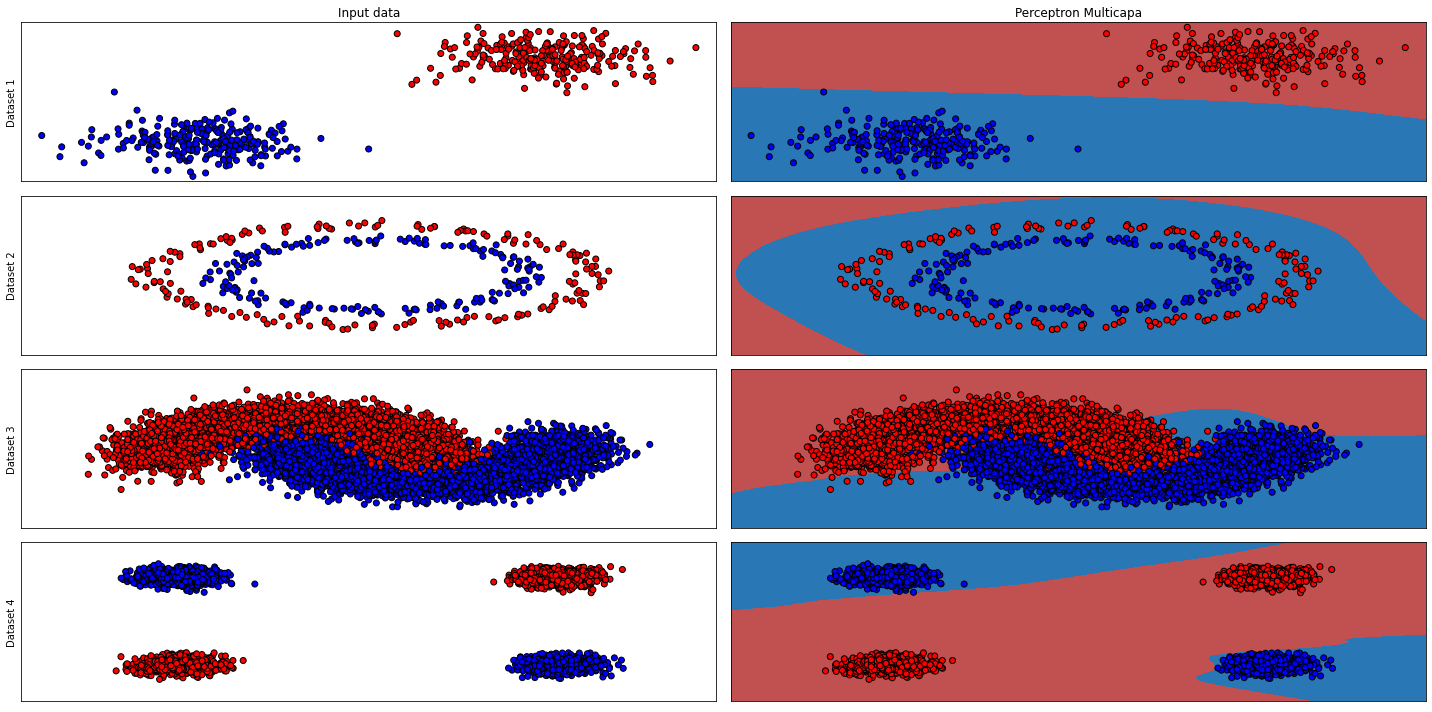

In [4]:
"""
Code from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Adapted for ML Practice by: David Pedroza Segoviano
"""

# Importing Important Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
# My own algorithms
from algorithms.perceptron import Perceptron as myPerceptron
from algorithms.perceptron_multicapa import FFNN
from algorithms.data_processing import preprocessing, postprocessing
# Importing something for file reading
from algorithms.read import read_files
# Just for debbuging
import time

# step size in the mesh
h = .02

# List of names of the classifier 
names = ['Perceptron Multicapa']
# List of the classifier
classifiers = [
    FFNN(hidden_size=250, training_epochs=100)]

# Reading my datasets (there are 3 of them)
datasets = read_files()

# Creating a figure
figure = plt.figure(figsize=(20, 10))
i = 1 # Subplot index

scores = {}

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Separate our data into coords (x1,x2) and label (y)
    X, y = ds
    # Calculate the max and the min for meshgrid creation
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the dataset
    cm = ListedColormap(['#c15050','#2978b5']) # Decision Boundary colors
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) # Points color
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # Subplot
    
    # Set the title
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')

    # Set some plotting things
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel(f"Dataset {ds_cnt+1}") # Dataset name
    ax.set_yticks(())
    ax.set_xticks(())
  
    i += 1 # Index + 1
    # Defining the matrix for k-fold cross validation
    scores[f'dataset{ds_cnt+1}'] = []
    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # We need to preprocessing the data with the multilayer
        if name == 'Perceptron Multicapa':
            X,y = preprocessing(X, y)

        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y) # Train the classifier with the dataset

        # Auxiliar for the mesh
        aux_mesh = np.c_[xx.ravel(), yy.ravel()]

        # Preprocessing again
        if name == 'Perceptron Multicapa':
            aux_mesh, _ = preprocessing(aux_mesh, y)
        # Assing a color to each point in the mesh
        # Depending on the classifier
        Z = clf.predict(aux_mesh)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        # Plot the Decision Boundary color
        ax.contourf(xx, yy, Z, cmap=cm, alpha=1)

        # Post processing the data for plotting
        if name == 'Perceptron Multicapa':
            X, y = postprocessing(X, y)


        # Plot again the points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')

        # Set up some graph properties 
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1 # Index

        # This "preprocessing" is for the cross validation
        if name == 'Perceptron Multicapa':
            X, y = preprocessing(X, y)

        ### ----- K-Fold cross validation ----- ###
        # Now we calculate the 10-Fold cross 
        if name != 'Perceptron Multicapa':
            scores[f'dataset{ds_cnt+1}'].append(cross_val_score(
                clf, X, y, cv=10, scoring="accuracy"))

# Converting scores to numpy
for key in scores.keys():
    scores[key] = np.array(scores[key])
    scores[key] = scores[key].T

# Plotting the solution
plt.tight_layout()
plt.savefig('Fronteras_De_Decision.jpg')
plt.show()

# K-Fold Validation Tables

In [5]:
# Importing pandas
import pandas as pd
# Separating for dataset
dataset1 = scores['dataset1']
dataset2 = scores['dataset2']
dataset3 = scores['dataset3']

In [6]:
# Create table for dataset 1
df1 = pd.DataFrame(dataset1, columns=names)
index = df1.index
index.name = "Dataset 1"

# Create table for dataset 2
df2 = pd.DataFrame(dataset2, columns=names)
index = df2.index
index.name = "Dataset 2"

# Create table for dataset 3
df3 = pd.DataFrame(dataset3, columns=names)
index = df3.index
index.name = "Dataset 3"

# Create table with accuracies (Only once)
#df1.to_csv('AccDat1.csv', encoding='ISO-8859-1')
#df2.to_csv('AccDat2.csv', encoding='ISO-8859-1')
#df3.to_csv('AccDat3.csv', encoding='ISO-8859-1')

In [7]:
df1 # Dataset 1

KNN  SVC  Mínima distancia  My Perceptron  PerceptronSKLearn
Dataset 1                                                              
0          1.0  1.0               1.0            1.0               1.00
1          1.0  1.0               1.0            1.0               1.00
2          1.0  1.0               1.0            1.0               1.00
3          1.0  1.0               1.0            1.0               1.00
4          1.0  1.0               1.0            1.0               1.00
5          1.0  1.0               1.0            1.0               1.00
6          1.0  1.0               1.0            1.0               1.00
7          1.0  1.0               1.0            1.0               1.00
8          1.0  1.0               1.0            1.0               1.00
9          1.0  1.0               1.0            1.0               0.98

In [8]:
df2 # Dataset 2

KNN  SVC  Mínima distancia  My Perceptron  PerceptronSKLearn
Dataset 2                                                              
0          1.0  1.0          0.400000       0.400000           0.371429
1          1.0  1.0          0.342857       0.514286           0.428571
2          1.0  1.0          0.485714       0.428571           0.428571
3          1.0  1.0          0.428571       0.428571           0.571429
4          1.0  1.0          0.257143       0.514286           0.285714
5          1.0  1.0          0.457143       0.628571           0.514286
6          1.0  1.0          0.342857       0.657143           0.285714
7          1.0  1.0          0.457143       0.514286           0.514286
8          1.0  1.0          0.485714       0.485714           0.485714
9          1.0  1.0          0.457143       0.428571           0.485714

In [9]:
df3 # Dataset 3

KNN    SVC  Mínima distancia  My Perceptron  PerceptronSKLearn
Dataset 3                                                                  
0          0.974  0.958             0.796          0.859              0.805
1          0.970  0.962             0.773          0.825              0.829
2          0.965  0.956             0.785          0.776              0.835
3          0.971  0.953             0.811          0.859              0.857
4          0.959  0.956             0.788          0.785              0.815
5          0.967  0.961             0.780          0.844              0.796
6          0.972  0.954             0.777          0.766              0.847
7          0.959  0.958             0.795          0.813              0.870
8          0.964  0.955             0.782          0.853              0.682
9          0.961  0.949             0.760          0.835              0.842